<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://bsethwalker.github.io/assets/img/clemson_paw.png"> </div>




## Week 5 | Lab: Dimensionality Reduction
 
**Clemson University**<br>
**Instructor(s):** Tim Ransom<br>

---

## Learning Goals
In this lab, we will look at how to use PCA to reduce a dataset to a smaller number of dimensions. The goal is for students to:
<ul>
  <li>Understand what PCA is and why it's useful</li>
  <li>Feel comfortable performing PCA on a new dataset</li>
  <li>Understand what it means for each component to capture variance from the original dataset</li>
  <li>Be able to extract the `variance explained` by components.</li>
  <li>Perform modelling with the PCA components</li>
</ul>  

**Make use of LaTeX formatting in this assignment to refer to technical values and variables, this lab is primarily interpretation and communication.** Take a look at [this documentation](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes#Adding_math_to_LaTeX) about inserting mathematical symbols using LaTeX. Each cell where you provide writing to interpret and communicate PCA should be about 2-3 sentences long.

--------------------

In [ ]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.linalg import svd
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

from sklearn.model_selection import train_test_split

# 1 - Principal Component Analysis(PCA)

## 1.1:  Introduction to PCA

What is PCA? PCA is a deterministic technique to transform data to a lowered dimensionality, whereby each feature/dimension captures the most variance possible.

Why do we care to use it?
<ul>
  <li>Visualizating the components can be useful</li>
  <li>Allows for more efficient use of resources (time, memory)</li>
  <li>Statistical reasons: fewer dimensions -> better generalization</li>
  <li>noise removal / collinearity (improving data quality)</li>
</ul>  

Imagine some dataset where we have two features that are pretty redundant. For example, maybe we have data concerning elite runners. Two of the features may include ``VO2 max`` and ``heartrate``. These are highly correlated. We probably don't need both, as they don't offer much additional information from each other. Using a [great visual example from online](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues), let's say that this unlabelled graph **(always label your axis)** represents those two features:



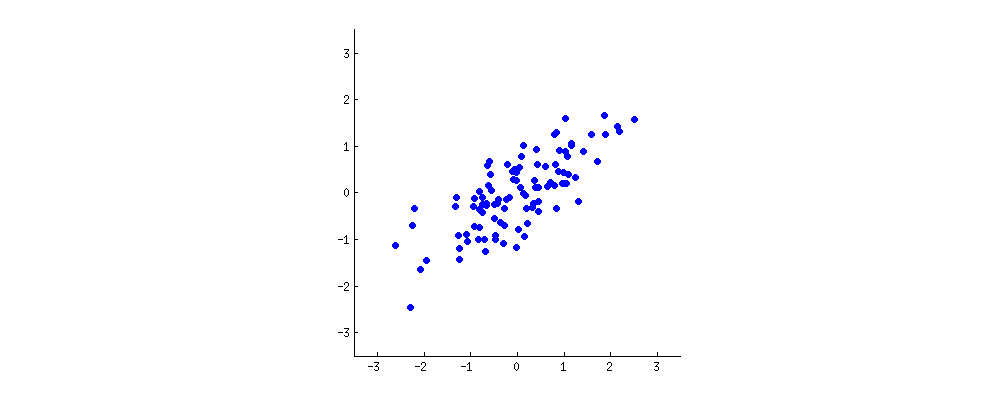

Let's say that this is our entire dataset, just 2 dimensions. If we wish to reduce the dimensions, we can only reduce it to just 1 dimension. A straight line is just 1 dimension (to help clarify this: imagine your straight line as being the x-axis, and values can be somewhere on this axis, but that's it. There is no y-axis dimension for a straight line). So, how should PCA select a straight line through this data?

Below, the image shows all possible projects that are centered in the data:

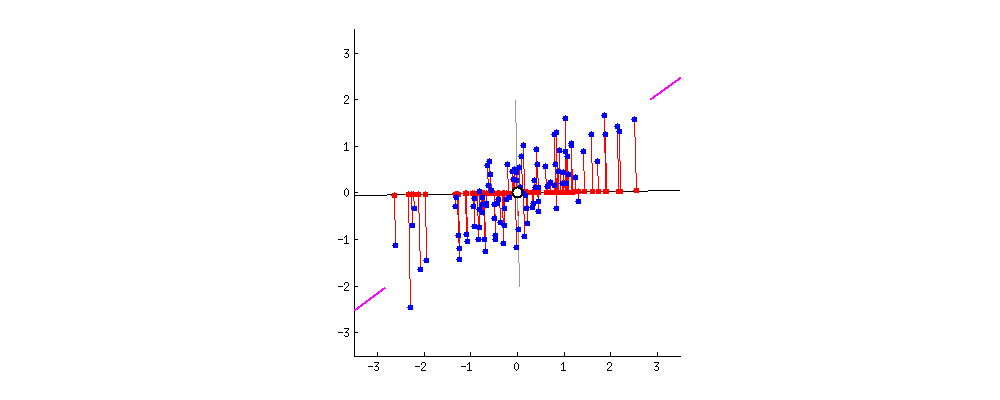

PCA picks the line that:
<ul>
<li>captures the most variance possible</li>
<li>minimizes the distance of the transformed points (distance from the original to the new space)</li>
</ul>

The animation **suggests** that these two aspects are actually the same. In fact, this is objectively true, but the proof for which is beyond the scope of the material for now. Feel free to read more at [this explanation](https://stats.stackexchange.com/questions/32174/pca-objective-function-what-is-the-connection-between-maximizing-variance-and-m/136072#136072) and via [Andrew Ng's notes](http://cs229.stanford.edu/notes/cs229-notes-all/cs229-notes10.pdf).

In short, PCA is a math technique that works with the covariance matrix -- the matrix that describes how all pairwise features are correlated with one another. Covariance of two variables measures the degree to which they moved/vary in the same directin; how much one variable affects the other. A positive covariance means they are positively related (i.e., x1 increases as x2 does); negative means negative correlation (x1 decreases as x2 increases).

In data science and machine learning, our models are often just finding patterns in the data this is easier if the data is spread out across each dimension and for the data features to be independent from one another (imagine if there's no variance at all. We couldn't do anything). Can we transform the data into a new set that is a linear combination of those original features?

PCA finds new dimensions (set of basis vectors) such that all the dimensions are orthogonal and hence linearly independent, and ranked according to the variance (eigenvalue). That is, the first component is the most important, as it captures the most variance.

## 1.2:  The Wine Dataset

Imagine that a wine sommelier has tasted and rated 1,000 distinct wines, and now that she's highly experienced, she is curious if she can more efficiently rate wines without even trying them. That is, perhaps her tasting preferences follow a pattern, allowing her to predict the rating a new wine without even trying it!  

The dataset contains 11 chemical features, along with a quality scale from 1-10; however, only values of 3-9 are actually used in the data. The ever-elusive perfect wine has yet to be tasted. 

#### **NOTE:** While this dataset involves the topic of alcohol, we, along with Clemson at large is in no way encouraging alcohol use, and this example should not be intrepreted as any endorsement for such; it is merely a pedagogical example. I apologize if this example offends anyone or is off-putting.

### Read-in and checking
First, let's read-in the data and verify it:

In [ ]:
wines_df = pd.read_csv("data/wines.csv")
wines_df.head()

In [ ]:
wines_df.describe()

<div class="exercise"> <b> Exerise 1</b> </div>

- Let's say that the wine expert is curious if she can predict, as a rough approximation, the **categorical quality -- bad, average, or great.** 
- Let's define those categories as follows:

    - `0` for **bad** - when for wines that have a quality <= 5
    - `1` for **average** when a wine has a quality of 6 or 7
    - `2` for **great** when a wine has a quality of >= 8

- Create a copy of `wines_df`DataFrame into a data frame called wines_df_recode so that we can make changes to it.
- Update `quality` column in `wines_df_recode` dataFrame as per above mentioned categories.

**Hint:** Refer to [pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) in order to categorize the values in `quality` column.

In [ ]:
"""Write your code for Exercise 1 here:"""

# your code here
raise NotImplementedError

### Preparing train and test Data

In [ ]:
x_data = wines_df_recode.drop(['quality'], axis=1)
y_data = wines_df_recode['quality']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=8, stratify=y_data)

# preview our data to check if we correctly constructed the labels (we did)
print(wines_df['quality'].head())
print(wines_df_recode['quality'].head())

For sanity, let's see how many wines are in each category:

In [ ]:
y_data.value_counts()

Now that we've split the data, let's look to see if there are any obvious patterns (correlations between different variables).

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(wines_df_recode, figsize=(30,20))
plt.show()

#### It looks like there aren't any particularly strong, interesting correlations among the predictors (maybe `total sulfur dioxide` and `free sulfur dioxide`) so we're safe to keep them all.

## 1.3: Prediction Models
Before we do anything too fancy, it's always best to start with something simple.

### MLE Baseline
Maximum-likelihood estimate is barely a model -- it simple returns the single label/class that maximizes the likelihood that the training data was observed. In other words, whichever label/class is most popular, it will always emit that as its answer, completely independent of any x-data. Above, we saw that the most popular label was `average`, represented by 598 of our 1,000 wines. Thus, our MLE should yield `average` for all inputs:

In [ ]:
mle_class = y_data.value_counts().idxmax()
mle_train_accuracy = len(y_train.loc[y_train == mle_class]) / len(y_train)
mle_test_accuracy = len(y_test.loc[y_test == mle_class]) / len(y_test)

# add it to a new dataframe of results
#model_results = {'MLE': [mle_train_accuracy, mle_test_accuracy]}

scores = [[mle_train_accuracy, mle_test_accuracy]]
names = ['MLE']
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

MLE gives a predictive accuracy is **60.0%** on the test set. Hopefully we can do better than this.

### Logistic Regression
Logistic regression is used for predicting categorical outputs, which is exactly what our task concerns. So, let's create a logistic regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(x_train,y_train)
print("Coefficients:", lr.coef_)
print("Intercepts:", lr.intercept_)

<div class="exercise"><b>Reflection Question:</b> What is stored in `.coef_` and `.intercept_`? Why are there so many of them? </div>

Coefficients and Intercepts:

Coefficients (lr.coef_): These are the weights assigned to each feature for each class. They determine how much influence a feature has on predicting the corresponding class.

This is a 2D array where each row corresponds to a class, and each column corresponds to a feature.

For class 0: Coefficients are [-5.88748118e-03, 4.67648845e+00, ...].
For class 1: Coefficients are [2.77837867e-02, -4.40682316e+00, ...].
For class 2: Coefficients are [4.47163187e-02, -1.88467272e+00, ...].
These values indicate the weight of each feature in determining whether an instance belongs to a given class.

Intercepts (lr.intercept_): These are the bias terms for each class, acting as the constant offset in the decision function.

Class 0: 4.83676629
Class 1: -3.65839273
Class 2: -8.55273966

These constants shift the decision boundaries for each class.

Let's measure its performance:

In [ ]:
lr_train_accuracy = lr.score(x_train, y_train)
lr_test_accuracy = lr.score(x_test, y_test)

# appends results to our dataframe
names.append('Logistic Regression')
scores.append([lr_train_accuracy, lr_test_accuracy])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

Yay, that's better than our MLE's performance. Can we do better with cross-validation?

#### Summary
- Logistic regression extends OLS to work naturally with a dependent variable that's only ever 0 and 1.
- In fact, Logistic regression is even more general and is used for predicting the probability of an example belonging to each of $N$ classes.
- The code for the two cases is identical and just like `LinearRegression`: `.fit`, `.score`, and all the rest
- Significant predictors does not imply that the model actually works well. Signifigance can be driven by data size alone.
- The data aren't enough to do what we want

**Warning**: Logistic regression _tries_ to hand back valid probabilities. As with all models, you can't trust the results until you validate them- if you're going to use raw probabilities instead of just predicted class, take the time to verify that if you pool all cases where the model says "I'm 30% confident it's class A" 30% of them actually are class A.

In [ ]:
logit_regr_lasso = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso.fit(x_train,y_train) # fit

y_train_pred_lasso = logit_regr_lasso.predict(x_train) # predict the test set
y_test_pred_lasso = logit_regr_lasso.predict(x_test) # predict the test set

train_score_lasso = accuracy_score(y_train, y_train_pred_lasso) # get train accuracy
test_score_lasso = accuracy_score(y_test, y_test_pred_lasso) # get test accuracy

names.append('Logistic Regression w/ CV + Lasso')
scores.append([train_score_lasso, test_score_lasso])
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy'])
df_results

<div class="exercise"><b>Reflection Questions:</b> </div>

- Hmm, cross-validation didn't seem to offer improved results. Is this correct? 
- Is it possible for cross-validation to not yield better results than non-cross-validation? 
- If so, how and why?


Yes, it's possible for cross-validation to not yield better results than non-cross-validated models, and this is not uncommon. 

1. Why Might Cross-Validation Not Improve Results?
    - `The Dataset Size and Quality`
        - Small Dataset: If the dataset is small or lacks sufficient variation, cross-validation might not provide significant improvements. It divides the data into folds, so each training subset is even smaller, which can limit the model's ability to learn.
        - Noisy Data: If the data contains noise, cross-validation could suffer as it evaluates multiple models on slightly different subsets of the same noisy data.
    
    - `Model Complexity`
        - Logistic regression with Lasso is a relatively simple and robust model. If the default parameters already work well (as in our "Logistic Regression" results), cross-validation might not significantly improve upon it.
        - Regularization (L1 in this case) already prevents overfitting, which reduces the need for cross-validation to fine-tune hyperparameters.

    - `Similarity of Training and Test Sets`
        - If the training and test datasets are highly representative of the same underlying distribution, cross-validation may not lead to an improvement. The model already generalizes well.
        
    - `Stability of Logistic Regression`
        - Logistic regression is a stable algorithm and does not rely heavily on tuning multiple hyperparameters. Cross-validation primarily adjusts the C (regularization strength) parameter, which might already be close to optimal.
        
2. When Does Cross-Validation Improve Results?
    - When the dataset is large and diverse, allowing cross-validation to identify the best hyperparameters for different data subsets.
    - When the model has multiple hyperparameters or is prone to overfitting (e.g., deep neural networks or decision trees).
    - When the baseline model is underperforming, and tuning the regularization or other settings significantly affects performance.
    
3. Why No Improvement in our Case?
  - In our case:
    - The logistic regression model without cross-validation already performed well (Train Accuracy = 0.715798, Test Accuracy = 0.714615).
    - Adding cross-validation slightly changed the regularization but didn’t significantly alter the performance (Train Accuracy = 0.715413, Test Accuracy = 0.713846).
    - The dataset might not have required further tuning for this model, as Lasso regularization effectively prevents overfitting.
    

4. Key Learnings from this:

    - Cross-validation does not guarantee better performance; it is a method for selecting the best model configuration. If the initial model is already well-tuned or if the dataset does not benefit from additional fine-tuning, the results with and without cross-validation may be very similar—or even slightly worse due to increased computational complexity.

    - In this case, the minimal difference between the two results is a sign that the initial logistic regression model was already near optimal for the given data.

In [ ]:
# insert the text of the third question into a variable called wakeup as a string
wakeup = ""

# your code here
raise NotImplementedError

## 1.4 Dimensionality Reduction

In attempt to improve performance, we may wonder if some of our features are redundant and are posing difficulties for our logistic regression model. Lets PCA to shrink the problem down to 2 dimensions (with as little loss as possible) and see if that gives us a clue about what makes this problem tough.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_components = 2

# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)

# reduce dimensions
pca_transformer = PCA(num_components).fit(x_train_scaled)
x_train_2d = pca_transformer.transform(x_train_scaled)
x_test_2d =  pca_transformer.transform(x_test_scaled)

print(x_train_2d.shape)
x_train_2d[0:5,:]

**NOTE:**
1. Both scaling and reducing dimension follow the same pattern: we fit the object to the training data, then use .transform() to convert the training and test data. This ensures that, for instance, we scale the test data using the _training_ mean and variance, not its own mean and variance
2. We need to equalize the variance of each feature before applying PCA; otherwise, certain dimensions will dominate the scaling. Our PCA dimensions would just be the features with the largest spread.

<div class="exercise"><b>Question 3:</b> why do we typically not scale or otherwise transform the 𝑦-values (class labels or target variable)?</div>

1. Because y-values are often categorical in classification, so there is no meaningful continuous scale to transform.
2. Because PCA is an unsupervised technique applied to feature variables, not the target variable.
3. Because scaling the y-values in classification always improves the model’s performance.
4. Because in a classification context, modifying discrete labels does not help uncover latent feature structure.
5. Because dimensionality reduction focuses on feature correlation and variance, which does not involve y-values.
6. Because not scaling y-values would cause data leakage from training to test sets.

Select all that apply by entering the corresponding number into an array stored in the variable `answer`

In [ ]:
answer = []
# your code here
raise NotImplementedError

Since our data only has 2 dimensions now, we can easily visualize the entire dataset. If we choose to color each datum with respect to its associated label/class, it allows us to see how separable the data is. That is, it gives an indication as to how easy/difficult it is for a model to fit the new, transformed data.

In [ ]:
# notice that we set up lists to track each group's plotting color and label
colors = ['r','c','b']
label_text = ["Bad Wines", "Average Wines", "Great Wines"]

# and we loop over the different groups
for cur_quality in [0,1,2]:
    cur_df = x_train_2d[y_train==cur_quality]
    plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[cur_quality], label=label_text[cur_quality])

# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.legend()

Well, that gives us some idea of why the problem is difficult! The bad, average, and great wines are all on top of one another. Not only are there few great wines, which we knew from the beginning, but there is no line that can easily separate the classes of wines.

<div class="exercise"><b>Question 4:</b></div>

- What critique can you make against the plot above? Why does this plot not prove that the different wines are hopelessly similar?</li>

1. PCA uses unlabeled data to run, so it does not necessarily project the data in a way that best separates these three wine categories.
2. Only two dimensions are shown, meaning relevant distinguishing information in higher PCA components (or in the original feature space) may be lost.
3. Overlap in a 2D plot does not mean there is no separability—the classes might be more distinct in the higher-dimensional space.
4. Plotting more than two PCA components at once always yields perfect class separation if the classes truly differ.
5. Class labels were not used to find these axes, so PCA may capture variance unrelated to wine quality.
6. The presence of points far on the PCA scale is conclusive evidence that the wines are indistinguishable in all dimension

Select your answers by entering the values into an array called `answer`

In [ ]:
answer = []

# your code here
raise NotImplementedError

Let's plot the same PCA'd data, but let's color code them according to if the wine is red or white

In [ ]:
# notice that we set up lists to track each group's plotting color and label
colors = ['r','c','b']
label_text = ["Reds", "Whites"]

# and we loop over the different groups
for cur_color in [0,1]:
    cur_df = x_train_2d[x_train['red']==cur_color]
    plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[cur_color], label=label_text[cur_color])
    
# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.legend()

Wow. Look at that separation. Too bad we aren't trying to predict if a wine is red or white. Does this graph help you answer our previous question? Does it change your thoughts?


## 1.5 Evaluating PCA: Variance Explained and Predictions
One of the criticisms we made of the PCA plot was that it's lost something from the original data. Heck, we're only using 2 dimensions, we it's perfectly reasonable and expected for us to lose some information -- our goal was that the information we were discarding was noise.

Let's investigate how much of the original data's structure the 2-D PCA captures. We'll look at the `explained_variance_ratio_` portion of the PCA fit. This lists, in order, the percentage of the x data's total variance that is captured by the nth PCA dimension.

In [ ]:
var_explained = pca_transformer.explained_variance_ratio_
print("Variance explained by each PCA component:", var_explained)
print("Total Variance Explained:", np.sum(var_explained))

The first PCA dimension captures 33% of the variance in the data, and the second PCA dimension adds another 20%. Together, we've captured about half of the total variation in the training data with just these two dimensions. So far, we've used PCA to transform our data, we've visualized our newly transformed data, and we've looked at the variance that it captures from the original dataset. That's a good amount of inspection; now let's actually use our transformed data to make predictions.

<br>

<div class="exercise"><b>Exercise 2:</b> </div>

- Use Logistic Regression (with and without cross-validation) on the PCA-transformed data - `x_train_2d` and `y_train`. 
- Create a logistic regression object named `lr` and fit the PCA-transformed data - `x_train_2d` and `y_train`.
- Calculate and store accuracy to `lr_pca_train_accuracy` and `lr_pca_test_accuracy` respectivly.
- Store the results from Logistic regression with cross-validation to `cv_scores`.
- **Calculate the Mean Accuracy:** After running cross-validation, calculate the mean accuracy score and store it to `lr_pca_cv_mean_accuracy`. You can do this by taking the mean of the cross-validation scores.
- Do you expect this to outperform our original 75% accuracy? 
- What are your results? Does this seem reasonable?

In [ ]:
"""Write your code for Exercise 2 here:"""

# your code here
raise NotImplementedError

In [ ]:
# Append results to comparison DataFrame
names.append('Logistic Regression w/ PCA')
scores.append([lr_pca_train_accuracy, lr_pca_test_accuracy, lr_pca_cv_mean_accuracy])

# Create DataFrame to compare results
df_results = pd.DataFrame(scores, index=names, columns=['Train Accuracy', 'Test Accuracy', 'CV Mean Accuracy'])
df_results

We're only using 2 dimensions. What if we increase our data to 10 PCA components?

### Let's Fit a PCA with 10 components

In [ ]:
# Fit a PCA with 10 components
pca_10d = PCA(n_components=10)
pca_10d.fit(x_train)

In [ ]:
# Explained variance ratio
explained_variance_ratio_10d = pca_10d.explained_variance_ratio_
cumulative_variance_10d = np.cumsum(explained_variance_ratio_10d)

# Print out cumulative variance for n=1 through 10
for i, cumulative_var in enumerate(cumulative_variance_10d, start=1):
    print(f"Total variance explained by {i} PCA components: {cumulative_var:.2f}")

In [ ]:
# Compare with 2D PCA
pca_2d = PCA(n_components=2)
pca_2d.fit(x_train)

explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"Variance explained by the first 2 components (2D PCA): {explained_variance_2d}")
print(f"Variance explained by the first 2 components (10D PCA): {explained_variance_ratio_10d[:2]}")

# Check if the first two components from 2D PCA match the 10D PCA
components_2d = pca_2d.components_
components_10d = pca_10d.components_[:2]

similarity = np.allclose(components_2d, components_10d)
print(f"Do the first two components of 2D PCA and 10D PCA match? {similarity}")


In [ ]:
# Plot cumulative variance against PCA dimensions
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), cumulative_variance_10d, marker='o')
plt.title('Cumulative Variance Explained by PCA Dimensions')
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

The plot above can be used to inform us when we reach diminishing returns on variance explained. That is, the `elbow` of the line is probably an ideal number of dimensions to use, at least with respect to the amount of variance explained.

<div class="exercise"><b>Question 7:</b>  </div>

1. Looking at the above graph, what is the 'elbow' point / how many PCA components do you think we should use? (integer)
2. Does this number of components imply that predictive performance will be optimal at this point? (True/False)

In [ ]:
answer1 = None
answer2 = None

# your code here
raise NotImplementedError

## 1.6 PCA Debriefing:

- PCA maps a high-dimensional space into a lower dimensional space.
- The PCA dimensions are ordered by how much of the original data's variance they capture
    - There are other cool and useful properties of the PCA dimensions (orthogonal, etc.). See a [textbook](http://math.mit.edu/~gs/linearalgebra/).
- PCA on a given dataset always gives the same dimensions in the same order.
- You can select the number of dimensions by fitting a big PCA and examining a plot of the cumulative variance explained.

PCA is not guaranteed to improve predictive performance at all. As you've learned in class now, none of our models are guaranteed to always outperform others on all datasets; analyses are a roll of the dice. The goal is to have a suite of tools to allow us to gather, process, disect, model, and visualize the data -- and to learn which tools are better suited to which conditions. Sometimes our data isn't the most conducive to certain tools, and that's okay.

What can we do about it?
1. Be honest about the methods and the null result. Lots of analyses fail.
2. Collect a dataset you think has a better chance of success. Maybe we collected the wrong chemical signals...
3. Keep trying new approaches. Just beware of overfitting the data you're validating on. Always have a test set locked away for when the final model is built.
4. Change the question. Maybe something you noticed during analysis seems interesting or useful (classifying red versus white). But again, you the more you try, the more you might overfit, so have test data locked away.
5. Just move on. If the odds of success start to seem small, maybe you need a new project.

# 2 - Singular Value Decomposition (SVD)

## 2.1 Introduction to Singular Value Decomposition (SVD)

Why do we care about SVD?
- Like PCA, the major benefit to using SVD is that it can be used to reduce the dimensionality of the data.
- Contrary to PCA, SVD does not center the data before performing computations. This means it can work with sparse matrices more efficiently.

The Singular Value Decomposition (SVD) of a matrix A is defined as:
    $ A = U \Sigma V^T $
where:
- U: mxn matrix of the orthogonal eigenvectors of $AA^T$
- $V^T$: transpose of an nxn matrix of the orthogonal eigenvectors of $A^TA$
- $\Sigma$: an nxn diagonal matrix of the single values which are the square roots of the eigenvalues of $A^TA$

For more on the math behind SVD, see [this](https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/positive-definite-matrices-and-applications/singular-value-decomposition/MIT18_06SCF11_Ses3.5sum.pdf) section of the MIT course covering SVD.


Let's take a look at an example of SVD.

In [ ]:
# Define a matrix
X = np.array([[3, 3, 2], [2,3,-2]])
print(X)

In [ ]:
# Perform SVD using the scipy.linalg.svd function
U, singular, V_transpose = svd(X)

In [ ]:
# Print the different components
print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)

## 2-2. The Wine Dataset with SVD
Now, we can look at SVD on the win dataset from earlier. We'll use the TruncatedSVD class from the sklearn.decomposition module. Documentation for this module can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [ ]:
num_components = 2

# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)

# reduce dimensions
svd_transformer = TruncatedSVD(num_components).fit(x_train_scaled)
x_train_2d = svd_transformer.transform(x_train_scaled)
x_test_2d =  svd_transformer.transform(x_test_scaled)

print(x_train_2d.shape)
x_train_2d[0:5,:]

**AS NOTED PREVIOUSLY:**
1. Both scaling and reducing dimension follow the same pattern: we fit the object to the training data, then use .transform() to convert the training and test data. This ensures that, for instance, we scale the test data using the _training_ mean and variance, not its own mean and variance
2. We need to equalize the variance of each feature before applying SVD; otherwise, certain dimensions will dominate the scaling. Our SVD dimensions would just be the features with the largest spread.

As we did earlier with PCA, let's take a look at what happens when we plot the red and white wines.

In [ ]:
# notice that we set up lists to track each group's plotting color and label
colors = ['r','c','b']
label_text = ["Reds", "Whites"]

# and we loop over the different groups
for cur_color in [0,1]:
    cur_df = x_train_2d[x_train['red']==cur_color]
    plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[cur_color], label=label_text[cur_color])
    
# all plots need labels
plt.xlabel("SVD Dimension 1")
plt.ylabel("SVD Dimention 2")
plt.legend()

As with PCA, we also want to take a look at the `explained_variance_ratio_` attribute of the SVD object.

In [ ]:
var_explained = svd_transformer.explained_variance_ratio_
print("Variance explained by each SVD component:", var_explained)
print("Total Variance Explained:", np.sum(var_explained))

# END